# Линейная алгебра: сходство текстов и аппроксимация функций

Данное задание основано на материалах секции, посвященной введению в линейную алгебру. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy и SciPy.

#### Вы научитесь:
* читать тексты из файла с помощью Python и разбивать их на слова
* переводить тексты в векторные пространства, вычислять расстояния в этих пространствах
* решать системы линейных уравнений
* приближать любые функции с помощью многочленов

#### Введение
В этом задании вы познакомитесь с некоторыми базовыми методами из линейной алгебры, реализованными в пакете SciPy — в частности, с методами подсчета косинусного расстояния и решения систем линейных уравнений. Обе эти задачи еще много раз встретятся нам в специализации. Так, на решении систем линейных уравнений основана настройка линейных моделей — очень большого и важного класса алгоритмов машинного обучения. Косинусное расстояние же часто используется в анализе текстов для измерения сходства между ними.

#### Материалы
Справка по функциям пакета scipy.linalg: http://docs.scipy.org/doc/scipy/reference/linalg.html

Справка по работе с файлами в Python: https://docs.python.org/2/tutorial/inputoutput.html#reading-and-writing-files

Справка по регулярным выражениям в Python (если вы захотите узнать про них чуть больше): https://docs.python.org/2/library/re.html

#### Инструкция по выполнению
Данное задание состоит из двух частей. В каждой ответом будет набор чисел, который вам нужно будет ввести в соответствующее поле через пробел.

# Задача 1: сравнение предложений
Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

кошки (животные)
UNIX-утилита cat для вывода содержимого файлов
версии операционной системы OS X, названные в честь семейства кошачьих
Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

Выполните следующие шаги:

1. Скачайте файл с предложениями (sentences.txt).
2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.
4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.
5. Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.
6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.
7. Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).
8. Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

Разумеется, использованный вами метод крайне простой. Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова. Позже мы будем подробно изучать анализ текстов, где выясним, как достичь высокого качества в задаче поиска похожих предложений.

In [1]:
import numpy as np
import scipy.spatial
import re
from itertools import chain

In [2]:
file_obj = open('sentences.txt', 'r')

In [3]:
sentences = []
for line in file_obj:
    sentences.append(line.strip().lower())

In [4]:
regexp = re.compile('[^a-z]')
sentence = []
for line in sentences:
    sent = []
    for word in re.split(regexp, line):
        if word:
            sent.append(word)
    sentence.append(sent)

In [5]:
words = {}
for index, word in enumerate(set(chain(*sentence))):
    words.update({word: index})

In [6]:
matrix = np.zeros((len(sentences), len(words)))
matrix.shape
for i in range(len(sentences)):
    for j in sentence[i]:
        matrix[i][words[j]] += 1
print(matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
distances = []      
for index in range(len(sentences)):
    distances.append((index, scipy.spatial.distance.cosine(matrix[0], matrix[index])))    
sorted_distance = sorted(distances, key=lambda x: x[1])
print(sorted_distance[1][0], sorted_distance[2][0])

6 4


In [8]:
print(sentences[sorted_distance[1][0]])
print(sentences[sorted_distance[2][0]])

domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).
in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.


# Задача 2: аппроксимация функции
Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

<img src="https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/YzsaOcqaEeW9HA7NOZMxaw_3d529582665934cff77bbcf55a28e43c_image01.png?expiry=1584057600000&hmac=aYSitMv7MKJJocq1byA9-1EPGuqNZHmRG64dakBi8tU">

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:

<img src="https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/SLHK79HnEeWvxwo5BbZD3w_ed4fb0020ad6ccb0b2e2ea50468b7789_lineqn.png?expiry=1584057600000&hmac=soZisB7MMJfYTxMsEMS7A880zw_3bbNEcxauXtwsUvU">

где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: w_0, w_1, w_2, w_3) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-2.txt).

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
%matplotlib inline

In [10]:
f = lambda x: np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)

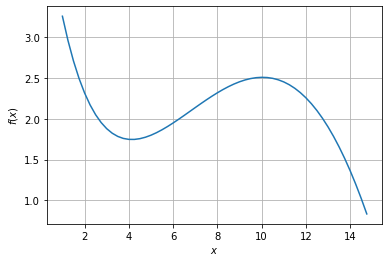

In [11]:
x = np.arange(1.0, 15.0, 0.25) # Массив значений аргумента
plt.plot(x, f(x)) # Построение графика
plt.xlabel('$x$') # Метка по оси x в формате TeX
plt.ylabel('$f(x)$') # Метка по оси y в формате TeX
plt.grid(True) # Сетка
plt.show() # Показать график

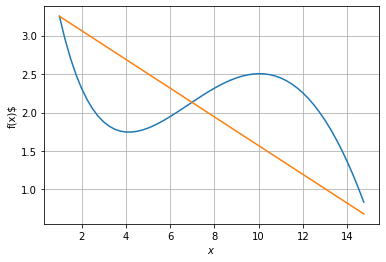

In [12]:
polynomial_rank = 1
A1 = [[1 ** n for n in range(0, polynomial_rank + 1)], 
      [15 ** n for n in range(0, polynomial_rank + 1)]]
b1 = [f(1), f(15)]
scipy.linalg.solve(A1, b1)

p = scipy.linalg.solve(A1, b1)

g = lambda x, p: p[0] + p[1] * x

x = np.arange(1.0, 15.0, 0.25) # Массив значений аргумента
plt.plot(x, f(x)) # Построение графика
plt.plot(x, g(x, p)) # Построение графика
plt.xlabel('$x$') # Метка по оси x в формате TeX
plt.ylabel('f(x)$') # Метка по оси y в формате TeX
plt.grid(True) # Сетка
plt.show() # Показать график

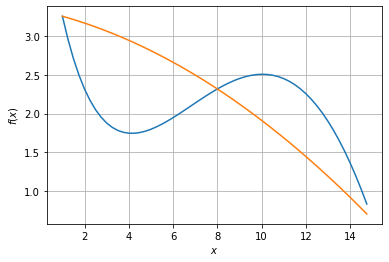

In [13]:
polynomial_rank = 2
A2 = [[1 ** n for n in range(0, polynomial_rank + 1)],
      [8 ** n for n in range(0, polynomial_rank + 1)],
      [15 ** n for n in range(0, polynomial_rank + 1)]]
b2 = [f(1), f(8), f(15)]
scipy.linalg.solve(A2, b2)

p = scipy.linalg.solve(A2, b2)

g = lambda x, p: p[0] + p[1] * x + p[2] * x ** 2
 
x=np.arange(1.0, 15.0, 0.25) # Массив значений аргумента
plt.plot(x, f(x)) # Построение графика
plt.plot(x, g(x, p)) # Построение графика
plt.xlabel('$x$') # Метка по оси x в формате TeX
plt.ylabel('$f(x)$') #Метка по оси y в формате TeX
plt.grid(True) # Сетка
plt.show() # Показать график

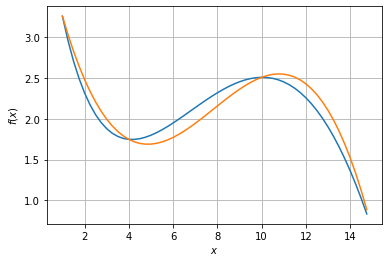

In [14]:
polynomial_rank = 3
A3 = [[1 ** n for n in range(0, polynomial_rank + 1)],
      [4 ** n for n in range(0, polynomial_rank + 1)],
      [10 ** n for n in range(0, polynomial_rank + 1)],
      [15 ** n for n in range(0, polynomial_rank + 1)]]
b3 = [f(1), f(4), f(10), f(15)]
scipy.linalg.solve(A3, b3)

p = scipy.linalg.solve(A3, b3)

g = lambda x, p: p[0] + p[1] * x + p[2] * x ** 2 + p[3] * x ** 3

x=np.arange(1.0, 15.0, 0.25) # Массив значений аргумента
plt.plot(x, f(x)) # Построение графика
plt.plot(x, g(x, p)) # Построение графика
plt.xlabel('$x$') # Метка по оси x в формате TeX
plt.ylabel('$f(x)$') # Метка по оси y в формате TeX
plt.grid(True) # Сетка
plt.show() # Показать график

In [15]:
polynomial = map(lambda x: x.round(2), scipy.linalg.solve(A3, b3))
print(list(polynomial))

[4.36, -1.3, 0.19, -0.01]
